# Classes 1: A first discussion of classes

A class is basically an object which bundles together variables and methods (functions) for working with the object. We'll discuss classes following chapter 7 of
* [L] *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.
This notebook will work through &sect; 7.1. 

The Python tutorial also has a [chapter on classes](https://docs.python.org/3/tutorial/classes.html).

## Function Classes

The book starts off with the special case of function classes. We have been using currying occassionally, so I thought it would be good to relate classes to currying.

Here is an example of function currying where we return an (affine) linear function $x \mapsto ax+b$. Here the variables $a$ and $b$ are parameters.

In [1]:
def linear_function(a, b):
    def f(x):
        return a*x + b
    return f

In [2]:
f = linear_function(2, -1)
for x in range(-2,5):
    print("f({}) = {}".format(x, f(x)))

f(-2) = -5
f(-1) = -3
f(0) = -1
f(1) = 1
f(2) = 3
f(3) = 5
f(4) = 7


A more or less equivalent construction built for classes is the following.

In [3]:
class LinearFunction:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __call__(self, x):
        return self.a * x + self.b

Here we have defined a class `LinearFunction` with two special methods:
* `__init__` which initializes a LinearFunction object.
* `__call__` which is a special method that allows us to use function notation using the object. So if `f` is a `LinearFunction` we can use the notation `f(x)`.

The variable `self` represents a particular `LinearFunction` object. The `__init__` method is called when a LinearFunction object is first constructed. We simply store the values of `a` and `b` in the LinearFunction object being built.

Then if `f` is a `LinearFunction` object it will have the parameters `a` and `b` stored in it. When we run `f(x)` it executes the `__call__` method. The `__call__` method makes use of the values of `a` and `b` we have stored off to compute $ax+b$.

Here we illustrate the use of the `LinearFunction` class:

In [4]:
f = LinearFunction(2, -1)

We constructed a `LinearFunction` $f$ above. This calls the `__init__` method with `self` being the new object and with $a=2$ and $b=-1$

The variables stored in a class object are its *attributes*. Our class has two attributes:

In [5]:
f.a

2

In [6]:
f.b

-1

We can evaluate the `__call__` method with the following:

In [7]:
f.__call__(2)

3

This executes the `__call__` method with `self` set to `f` and with `x` set to $2$. Because `__call__` is a special method representing funtion application, we can also call it with:

In [8]:
f(2)

3

We can see our class works just as well as our `linear_function` example using currying:

In [9]:
f = LinearFunction(2, -1)
for x in range(-2,5):
    print("f({}) = {}".format(x, f(x)))

f(-2) = -5
f(-1) = -3
f(0) = -1
f(1) = 1
f(2) = 3
f(3) = 5
f(4) = 7


## Adding more methods

A method is a function we can call involving from a class object. Most functions you create will not be special functions, so you can use pretty much whatever name you want. Below we add an `integral` method which computes
$$\int_c^d f(x)~dx$$
if $f$ is a `LinearFunction`.

In [10]:
class LinearFunction:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __call__(self, x):
        return self.a * x + self.b
    
    def integral(self, c, d):
        return 0.5*self.a*(d**2-c**2) + self.b*(d-c)

Here we demonstrate the use of our new method:

In [11]:
f = LinearFunction(1, 0) # The linear function x mapsto x
f.integral(0, 1) # The integral from 0 to 1

0.5

Recall that in the linear function 
$$x \mapsto ax+b,$$
the number $a$ represents the slope and $b$ represents the $y$-intercept. We add methods for these.

In [12]:
class LinearFunction:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __call__(self, x):
        return self.a * x + self.b
    
    def integral(self, c, d):
        return 0.5*self.a*(d**2-c**2) + self.b*(d-c)
    
    def slope(self):
        return self.a
    
    def y_intercept(self):
        "return the y-intercept"
        return self.b

Here we demonstrate their use:

In [13]:
f = LinearFunction(3, 2)

In [14]:
f.slope()

3

In [15]:
f.y_intercept()

2

## Creating a immutable class

Often we'll want to create a class where the value represented is *immutable*, that is, it does not change. Allowing an object to change can often lead to unexpected results.

Our linear function can be changed because attributes can be set.

Here is an example of an issue that can arise, because we usually think of functions as things which do not change.

In [16]:
f = LinearFunction(3, 2)
print("f({}) = {}".format(1,f(1)))

f(1) = 5


In [17]:
# Now we change an attribute.
f.a = -3
print("f({}) = {}".format(1,f(1)))

f(1) = -1


We can access the methods and attributes available for an object in `jupyter` by typing an object a period (e.g., `f.`) and then pressing tab. Doing this you should get something like:
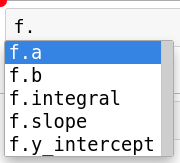

Note that we do not see the `__init__` or `__call__` methods. This is because their names begin with an underscore. So, we can hide the `a` and `b` attributes by giving these variables names that begin with an underscore. We'll use `_a` and `_b`. We make this modification to our class below:

In [18]:
class LinearFunction:
    def __init__(self, a, b):
        self._a = a
        self._b = b
    
    def __call__(self, x):
        return self._a * x + self._b
    
    def integral(self, c, d):
        return 0.5*self._a*(d**2-c**2) + self._b*(d-c)
    
    def slope(self):
        return self._a
    
    def y_intercept(self):
        return self._b

In [19]:
f = LinearFunction(3, 2)

Now typing `f.` and pressing tab yields:
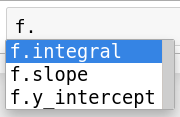

The attributes have just been hidden. This is generally considered good enough for the purposes of creating an immutable object. While the object is not truly immutable, it means that the user is not likely to accidentally change the value of an attribute. The user can still do:

In [20]:
f._b = 3

## Printing an object

It is nice to have a way to print an object to examine it. Currently we do not have a nice print out observe:

In [21]:
print(f)

To fix this we can create a `__str__` method for converting our object to a human readable string. Here we add this method.

In [22]:
class LinearFunction:
    def __init__(self, a, b):
        self._a = a
        self._b = b
    
    def __call__(self, x):
        return self._a * x + self._b
    
    def integral(self, c, d):
        return 0.5*self._a*(d**2-c**2) + self._b*(d-c)
    
    def slope(self):
        return self._a
    
    def y_intercept(self):
        return self._b
    
    def __str__(self):
        return "the linear function sending x to {}x + {}" \
            .format(self._a, self._b)

In [23]:
f = LinearFunction(3, 4)

In [24]:
print(f)

the linear function sending x to 3x + 4


Note that if we just leave a trailing `f` at the end of a code block, we still get nonsense:

In [25]:
f

To fix this we add a `__repr__` method. This is supposed to provide a complete representation of the object in a way that might be useful for the programmer (as opposed to `__str__` which is supposed to be readable). Here we add such a method.

In [26]:
class LinearFunction:
    def __init__(self, a, b):
        self._a = a
        self._b = b
    
    def __call__(self, x):
        return self._a * x + self._b
    
    def integral(self, c, d):
        return 0.5*self._a*(d**2-c**2) + self._b*(d-c)
    
    def slope(self):
        return self._a
    
    def y_intercept(self):
        return self._b
    
    def __str__(self):
        return "the linear function sending x to {}x + {}" \
            .format(self._a, self._b)
    
    def __repr__(self):
        return "LinearFunction({}, {})".format(self._a, self._b)

In [27]:
f = LinearFunction(3, 4)
f

LinearFunction(3, 4)

You can read more about these *magic methods* in [this medium article](https://medium.com/python-features/magic-methods-demystified-3c9e93144bf7). For a more technical description of the magic methods see the [Python reference](https://docs.python.org/3/reference/datamodel.html).

## Documentating a class

Recall that in `jupyter` you can find out information about a function or class by typing the function name followed by a question mark and pressing tab. Our class and its methods have no docstring. Here we add docstrings to our function.

In [28]:
class LinearFunction:
    """
    Represents a linear function from the real numbers to the real 
    numbers.
    
    To construct the linear function mapping x to ax+b, use the
    command `LinearFunction(a, b)`.
    """
    def __init__(self, a, b):
        """Construct the linear function mapping x to ax+b."""
        self._a = a
        self._b = b
    
    def __call__(self, x):
        return self._a * x + self._b
    
    def integral(self, c, d):
        """
        Compute the integral of this function over the interval [c,d]
        """
        return 0.5*self._a*(d**2-c**2) + self._b*(d-c)
    
    def slope(self):
        """Return the slope of this line."""
        return self._a
    
    def y_intercept(self):
        """
        Return the y-coordinate of the intersection of this line
        with the y-axis. This is the same as evaluating the line
        at zero.
        """
        return self._b
    
    def __str__(self):
        return "the linear function sending x to {}x + {}" \
            .format(self._a, self._b)
    
    def __repr__(self):
        return "LinearFunction({}, {})".format(self._a, self._b)

The docstrings are distinguished by triple parenthesis above. With this class definition, we can access documentation for the class by typing the following:

In [29]:
LinearFunction?

We can also access the documentation for the methods.

In [30]:
f = LinearFunction(0, 0)

In [31]:
f.slope?

In [32]:
f.y_intercept?

In [33]:
f.integral?

In [35]:
f.__init__?

This [geeksforgeeks article](https://www.geeksforgeeks.org/python-docstrings/) has a good brief introduction to Python docstrings.

## Mathematical Magic Methods

If $f:{\mathbb R} \to {\mathbb R}$ and $g:{\mathbb R} \to {\mathbb R}$ are two linear functions, then their sum 
$$f+g:{\mathbb R} \to {\mathbb R}; \quad x \mapsto f(x)+g(x)$$
is also linear. We'd like to be able to add two linear functions by typing `f+g` in Python. To do this we can define an `__add__` function. We add a method like this below.

In [53]:
class LinearFunction:
    """
    Represents a linear function from the real numbers to the real 
    numbers.
    
    To construct the linear function mapping x to ax+b, use the
    command `LinearFunction(a, b)`.
    """
    def __init__(self, a, b):
        """Construct the linear function mapping x to ax+b."""
        self._a = a
        self._b = b
    
    def __call__(self, x):
        return self._a * x + self._b
    
    def integral(self, c, d):
        """
        Compute the integral of this function over the interval [c,d]
        """
        return 0.5*self._a*(d**2-c**2) + self._b*(d-c)
    
    def slope(self):
        """Return the slope of this line."""
        return self._a
    
    def y_intercept(self):
        """
        Return the y-coordinate of the intersection of this line
        with the y-axis. This is the same as evaluating the line
        at zero.
        """
        return self._b
    
    def __str__(self):
        return "the linear function sending x to {}x + {}" \
            .format(self._a, self._b)
    
    def __repr__(self):
        return "LinearFunction({}, {})".format(self._a, self._b)
    
    def __add__(self, other):
        """
        Return the sum with another LinearFunction. Adding other
        types will result in a TypeError.
        """
        if type(other) == LinearFunction:
            return LinearFunction(self._a + other._a, self._b + other._b)
        raise TypeError("Only a LinearFunction can be added to a LinearFunction.")

Here we demonstrate how to carry out addition.

In [49]:
f = LinearFunction(1, 2)
g = LinearFunction(3, 4)
h = f+g # Results in a call to f.__add__(g)
print("The sum of {} and {} is {}.".format(f,g,h))

The sum of the linear function sending x to 1x + 2 and the linear function sending x to 3x + 4 is the linear function sending x to 4x + 6.


Note that our implementation only supports addition with a linear function. In principle we might support adding numbers as well. For example, $f+5$ is the function sending $x$ to $f(x)+5$. However, we set it up to give a TypeError.

In [51]:
f+5

TypeError: Only a LinearFunction can be added to a LinearFunction.

By including `__add__` the `+=` operator is also useable. By default writing `f += g` is the same as writing `f = f+g`.

In [52]:
g += f
g

LinearFunction(4, 6)

In multiplication (similar to addition) writing `c * f` will result in `c.__mul__(f)`. But if this fails, `f.__rmul__` will be called. Here I am thinking of `c` as a number so that 
$$cf: x \mapsto c f(x).$$
Since $c$ is a number, it will not support multiplication by a `LinearFunction` so instead we should implement `__rmul__` to get scalar multiplication. Below we have added such an implementation.

In [56]:
class LinearFunction:
    """
    Represents a linear function from the real numbers to the real 
    numbers.
    
    To construct the linear function mapping x to ax+b, use the
    command `LinearFunction(a, b)`.
    """
    def __init__(self, a, b):
        """Construct the linear function mapping x to ax+b."""
        self._a = a
        self._b = b
    
    def __call__(self, x):
        return self._a * x + self._b
    
    def integral(self, c, d):
        """
        Compute the integral of this function over the interval [c,d]
        """
        return 0.5*self._a*(d**2-c**2) + self._b*(d-c)
    
    def slope(self):
        """Return the slope of this line."""
        return self._a
    
    def y_intercept(self):
        """
        Return the y-coordinate of the intersection of this line
        with the y-axis. This is the same as evaluating the line
        at zero.
        """
        return self._b
    
    def __str__(self):
        return "the linear function sending x to {}x + {}" \
            .format(self._a, self._b)
    
    def __repr__(self):
        return "LinearFunction({}, {})".format(self._a, self._b)
    
    def __add__(self, other):
        """
        Return the sum with another LinearFunction. Adding other
        types will result in a TypeError.
        """
        if type(other) == LinearFunction:
            return LinearFunction(self._a + other._a, self._b + other._b)
        raise TypeError("Only a LinearFunction can be added to a LinearFunction.")

    def __rmul__(self, c):
        """
        Return this LinearFunction scaled by a multiplicative constant.
        """
        return LinearFunction(c * self._a, c * self._b)        

Here we demonstrate that it works:

In [58]:
f = LinearFunction(1, 2)
-5 * f

LinearFunction(-5, -10)

Below, I included a list of magic methods that seem likely to be useful and mathematically relevant. This list is not comprehensive. For a comprehensive list see the [Emulating numeric types from the Python reference](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types).

| Method | Operator | Note |
| :---   | :---     | :--- |
| `__add__(self, other)` | `self+other` | |
| `__sub__(self, other)` | `self-other` | |
| `__mul__(self, other)` | `self*other` | |
| `__matmul__(self, other)` | `self@other` | composition |
| `__truediv__(self, other)` | `self/other` | |
| `__mod__(self, other)` | `self%other` | |
| `__pow__(self, other[, modulo])` | `self**other` | |
| `__radd__(self, other)` | `other+self` | |
| `__rsub__(self, other)` | `other-self` | |
| `__rmul__(self, other)` | `other*self` | |
| `__rmatmul__(self, other)` | `other@self` | |
| `__rtruediv__(self, other)` | `other/self` | |
| `__rmod__(self, other)` | `other%self` | |
| `__rpow__(self, other[, modulo])` | `other**self` | |
| `__neg__(self)` | `-self` | negation |
| `__abs__(self)` | `abs(self)` | absolute value |
| `__invert__(self)` | `~self` | multiplicative inverse |